# Generate Data

In [19]:
# Imports
from pathlib import Path
from tqdm import tqdm
from elements import elements
from mendeleev import element

from Code.cifSimulation import structureGenerator
from Code.h5Constructor import h5Constructor

import cProfile

## Cif generation

In [2]:
# Path to dataset
datasetPath = './Dataset/CIFs/SimulatedTest2/'

# Initialize the CIF generator
generator = structureGenerator()

# Maximum number of atom species in generated structures
n_species = 2

# Choose required atoms to use
required_atoms = ['O']

# Choose optional atoms to use
metals = [atom.Symbol for atom in elements.Alkali_Metals] 
metals += [atom.Symbol for atom in elements.Alkaline_Earth_Metals] 
metals += [atom.Symbol for atom in elements.Transition_Metals] 
metals += [atom.Symbol for atom in elements.Metalloids] 
metals += [atom.Symbol for atom in elements.Others]

optional_atoms = []
for metal in metals:
    try:
        elm_data = element(metal)
        if elm_data.metallic_radius or elm_data.atomic_radius:
            optional_atoms.append(metal)
        else:
            print(f'Removed {metal} from dataset as no table values were available.')
    except:
        print(f'Removed {metal} from dataset as no table values were available.')
optional_atoms = ['Zn', 'Nb']

# Simulate mono-metal oxides
generator.create_cif_dataset(
    n_species=n_species,
    required_atoms=required_atoms,
    optional_atoms=optional_atoms,
    from_table_values=False,
    save_folder=datasetPath,
)

Removed Fr from dataset as no table values were available.
Removed Bh from dataset as no table values were available.
Removed Db from dataset as no table values were available.
Removed Hs from dataset as no table values were available.
Removed Mt from dataset as no table values were available.
Removed Rf from dataset as no table values were available.
Removed Sg from dataset as no table values were available.
Removed Uub from dataset as no table values were available.
Removed Uun from dataset as no table values were available.
Removed Uuu from dataset as no table values were available.


Calculating cell parameter approximations: 100%|██████████| 14/14 [01:48<00:00,  7.78s/it]


Simulating CIFs


Structure types: 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]


## .h5 generation

In [21]:
gc = h5Constructor(cif_dir='./Dataset/CIFs/SimulatedTest2/', save_dir='./Dataset/h5/SimulatedTest3/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cuda")', sort='tottime')
gc.gen_h5s(parallelize=False, device='cuda', np_radii=[5,10])

CadmiumChloride_NbO2


CadmiumIodide_ZnO2
Fluorite_NbO2
Spinel_NbNb2O4
Wurtzite_NbO
RockSalt_NbO
Wurtzite_ZnO
NickelArsenide_NbO
CaesiumChloride_ZnO
CadmiumIodide_NbO2
NickelArsenide_ZnO
Rutile_ZnO2
AntiFluorite_Zn2O
ZincBlende_ZnO
AntiFluorite_Nb2O
Spinel_ZnZn2O4
Rutile_NbO2
CaesiumChloride_NbO
RheniumTrioxide_ZnO3
RockSalt_ZnO
CadmiumChloride_ZnO2
RheniumTrioxide_NbO3
Fluorite_ZnO2
ZincBlende_NbO


## Misc

In [1]:
from mendeleev import element
from mendeleev.fetch import fetch_table

In [32]:
node_feature_table = fetch_table('elements')[['atomic_number', 'atomic_radius', 'atomic_weight', 'electron_affinity']]

In [33]:
node_feature_table.describe()

,atomic_number,atomic_radius,atomic_weight,electron_affinity
count,118.000000,90.000000,118.000000,77.000000
mean,59.500000,149.844444,146.469608,0.437697
std,34.207699,40.079110,89.643663,2.880333
min,1.000000,25.000000,1.008000,-19.700000
25%,30.250000,135.000000,66.465750,0.322000
50%,59.500000,145.000000,142.574830,0.650000
75%,88.750000,178.750000,226.750000,1.165000
max,118.000000,260.000000,294.000000,3.612725


In [34]:
node_feature_table['electron_affinity'].fillna(0.0, inplace=True)

In [24]:
node_feature_table['atomic_radius']

0       25.0
1      120.0
2      145.0
3      105.0
4       85.0
       ...  
113      NaN
114      NaN
115      NaN
116      NaN
117      NaN
Name: atomic_radius, Length: 118, dtype: float64

In [23]:
node_feature_table.describe()

,atomic_number,atomic_radius,atomic_weight,electron_affinity
count,118.000000,90.000000,118.000000,118.000000
mean,59.500000,149.844444,146.469608,0.285616
std,34.207699,40.079110,89.643663,2.330852
min,1.000000,25.000000,1.008000,-19.700000
25%,30.250000,135.000000,66.465750,0.000000
50%,59.500000,145.000000,142.574830,0.303500
75%,88.750000,178.750000,226.750000,0.904055
max,118.000000,260.000000,294.000000,3.612725


In [8]:
import numpy as np

# Define the element symbol
element_symbol = 'O'

# Get the row corresponding to the element symbol
element_row = node_feature_table[node_feature_table['symbol'] == element_symbol]

# Extract the required features as a numpy array
element_features = element_row[['atomic_number', 'atomic_radius', 'atomic_weight', 'electron_affinity']].to_numpy()


In [10]:
element_features.flatten()

array([ 8.       , 60.       , 15.999    ,  1.4611135])

# Load and inspect data

In [1]:
from Code.datasetClass import InOrgMatDatasets
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mendeleev import element
from tqdm.auto import tqdm
warnings.simplefilter(action='ignore') # , category=FutureWarning

dataset = InOrgMatDatasets('Simulated_rmax60', root='./Dataset/')

Extracting Dataset/Simulated_rmax60/raw/Simulated_rmax60.zip
Processing...
Done!


In [2]:
dataset.create_data_split()
dataset.create_data_split(split_strategy='stratified', stratify_on='Crystal type')

In [3]:
dataset.load_data_split(split_strategy='stratified', stratify_on='Crystal type')

In [4]:
idx = 1
print(dataset.len())
print(dataset.get(idx).y['atomic_species'])
print(dataset.get(idx))

3240
tensor([ 9., 21.])
Data(
  x=[279, 4],
  edge_index=[2, 876],
  edge_attr=[1448],
  y={
    crystal_type='CadmiumChloride',
    space_group_symbol='C 2/m',
    space_group_number=12,
    atomic_species=[2],
    n_atomic_species=2,
    np_size=23.96804428100586,
    n_atoms=279,
    n_bonds=876,
    cell_params=[6],
    unit_cell_node_feat=[9, 4],
    unit_cell_edge_index=[2, 12],
    unit_cell_edge_feat=[18],
    unit_cell_pos_abs=[9, 3],
    unit_cell_pos_frac=[9, 3],
    nd=[2, 580],
    xrd=[2, 580],
    nPDF=[2, 6000],
    xPDF=[2, 6000],
    sans=[2, 300],
    saxs=[2, 300],
  },
  pos_frac=[279, 3],
  pos_abs=[279, 3]
)


In [5]:
print(dataset.len(split='train'), dataset.len(split='validation'), dataset.len(split='test'))
dataset.get(1, split='test')

1554 519 519


Data(
  x=[1412, 4],
  edge_index=[2, 4888],
  edge_attr=[4896],
  y={
    crystal_type='Wurtzite',
    space_group_symbol='C m c 21',
    space_group_number=36,
    atomic_species=[2],
    n_atomic_species=2,
    np_size=33.739349365234375,
    n_atoms=1412,
    n_bonds=4888,
    cell_params=[6],
    unit_cell_node_feat=[4, 4],
    unit_cell_edge_index=[2, 8],
    unit_cell_edge_feat=[8],
    unit_cell_pos_abs=[4, 3],
    unit_cell_pos_frac=[4, 3],
    nd=[2, 580],
    xrd=[2, 580],
    nPDF=[2, 5000],
    xPDF=[2, 5000],
    sans=[2, 300],
    saxs=[2, 300],
  },
  pos_frac=[1412, 3],
  pos_abs=[1412, 3]
)

## Create .xyz file

In [13]:
# Loop over all indices in the dataset
for idx in tqdm(range(dataset.len())):
    # Get the sample at an index
    # idx = 9
    sample = dataset.get(idx)

    # Extract the absolute coordinates and atomic numbers
    coords = sample.pos_abs.numpy()
    atomic_numbers = sample.x[:,0].numpy().astype(int)
    n_atoms = sample.y['n_atoms']

    # Write the .xyz file
    with open(f'./Dataset/xyz/SimulatedTest2/{idx}.xyz', 'w') as f:
        f.write(f'{n_atoms}\n')
        f.write('\n')
        for i in range(n_atoms):
            f.write(f'{element(int(atomic_numbers[i])).symbol} {coords[i,0]} {coords[i,1]} {coords[i,2]}\n')


  0%|          | 0/48 [00:00<?, ?it/s]

## Plotting and statistics

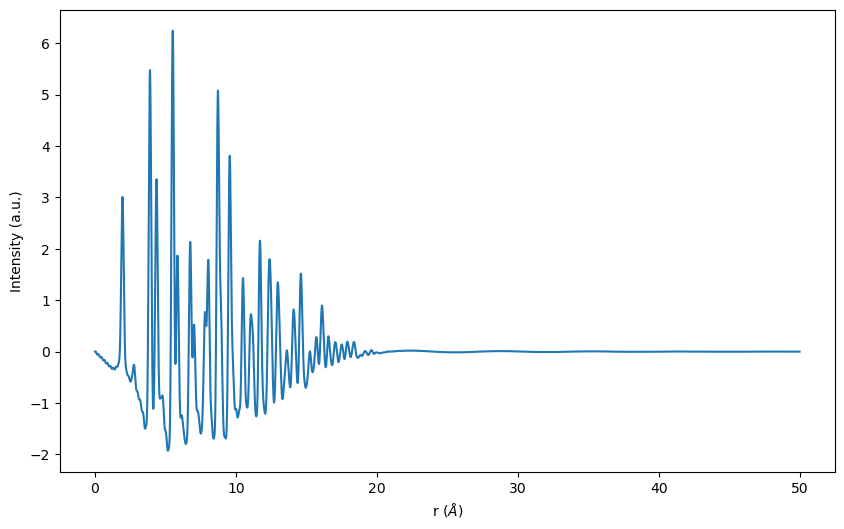

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(*dataset.get(540, split='train').y['xPDF'])
plt.ylabel('Intensity (a.u.)')
plt.xlabel('r ($\AA$)')
plt.show()

In [5]:
stats = dataset.get_statistics(return_dataframe=True)
stats.head()

,idx,# of nodes,# of edges,# of elements,Space group (Symbol),Space group (Number),Crystal type,NP size (Å),Elements,Random data split,Stratified data split (Crystal type)
0,0,31.0,84.0,2.0,C 2/m,12.0,CadmiumChloride,10.817969,"[tensor(9.), tensor(21.)]",Test,Train
1,1,279.0,876.0,2.0,C 2/m,12.0,CadmiumChloride,23.968044,"[tensor(9.), tensor(21.)]",Train,Train
2,2,875.0,2964.0,2.0,C 2/m,12.0,CadmiumChloride,34.560139,"[tensor(9.), tensor(21.)]",Train,Train
3,3,2005.0,7092.0,2.0,C 2/m,12.0,CadmiumChloride,43.835541,"[tensor(9.), tensor(21.)]",Train,Train
4,4,3927.0,14220.0,2.0,C 2/m,12.0,CadmiumChloride,54.064667,"[tensor(9.), tensor(21.)]",Train,Train


In [6]:
stats.describe()

,idx,# of nodes,# of edges,# of elements,Space group (Number),NP size (Å)
count,3240.000000,3240.000000,3240.000000,3240.0,3240.000000,3240.000000
mean,1619.500000,2207.171296,9635.504321,2.0,151.583333,33.356017
std,935.451763,2333.691112,11644.764769,0.0,89.484903,14.692912
min,0.000000,23.000000,0.000000,2.0,12.000000,9.429051
25%,809.750000,375.000000,1128.000000,2.0,56.250000,22.606434
50%,1619.500000,1387.000000,5052.000000,2.0,218.500000,33.514938
75%,2429.250000,3455.500000,13974.000000,2.0,225.000000,44.044496
max,3239.000000,14601.000000,96496.000000,2.0,227.000000,56.211433


In [7]:
stats[stats['# of edges'] == 0]

,idx,# of nodes,# of edges,# of elements,Space group (Symbol),Space group (Number),Crystal type,NP size (Å),Elements,Random data split,Stratified data split (Crystal type)
1230,1230,39.0,0.0,2.0,C m c m,63.0,NickelArsenide,13.401795,"[tensor(9.), tensor(89.)]",Validation,Validation
1231,1231,271.0,0.0,2.0,C m c m,63.0,NickelArsenide,24.387047,"[tensor(9.), tensor(89.)]",Train,Train
1232,1232,773.0,0.0,2.0,C m c m,63.0,NickelArsenide,34.764866,"[tensor(9.), tensor(89.)]",Train,Train
1233,1233,1779.0,0.0,2.0,C m c m,63.0,NickelArsenide,44.815872,"[tensor(9.), tensor(89.)]",Test,Train
1234,1234,3263.0,0.0,2.0,C m c m,63.0,NickelArsenide,55.000683,"[tensor(9.), tensor(89.)]",Validation,Validation
1365,1365,39.0,0.0,2.0,C m c m,63.0,NickelArsenide,14.358957,"[tensor(9.), tensor(56.)]",Validation,Train
1366,1366,271.0,0.0,2.0,C m c m,63.0,NickelArsenide,25.771946,"[tensor(9.), tensor(56.)]",Test,Validation
1367,1367,707.0,0.0,2.0,C m c m,63.0,NickelArsenide,35.457714,"[tensor(9.), tensor(56.)]",Train,Train
1368,1368,1441.0,0.0,2.0,C m c m,63.0,NickelArsenide,45.516819,"[tensor(9.), tensor(56.)]",Train,Test
1369,1369,2855.0,0.0,2.0,C m c m,63.0,NickelArsenide,55.581509,"[tensor(9.), tensor(56.)]",Train,Train


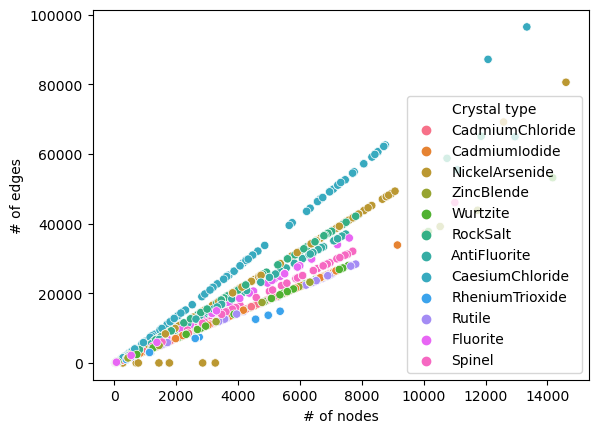

In [8]:
sns.scatterplot(data=stats, x='# of nodes', y='# of edges', hue='Crystal type')
plt.show()

In [9]:
palette = sns.color_palette('tab10')
color_dict = {'Train': palette[0], 'Validation': palette[1], 'Test': palette[2]}
hue_order = ['Train', 'Validation', 'Test']

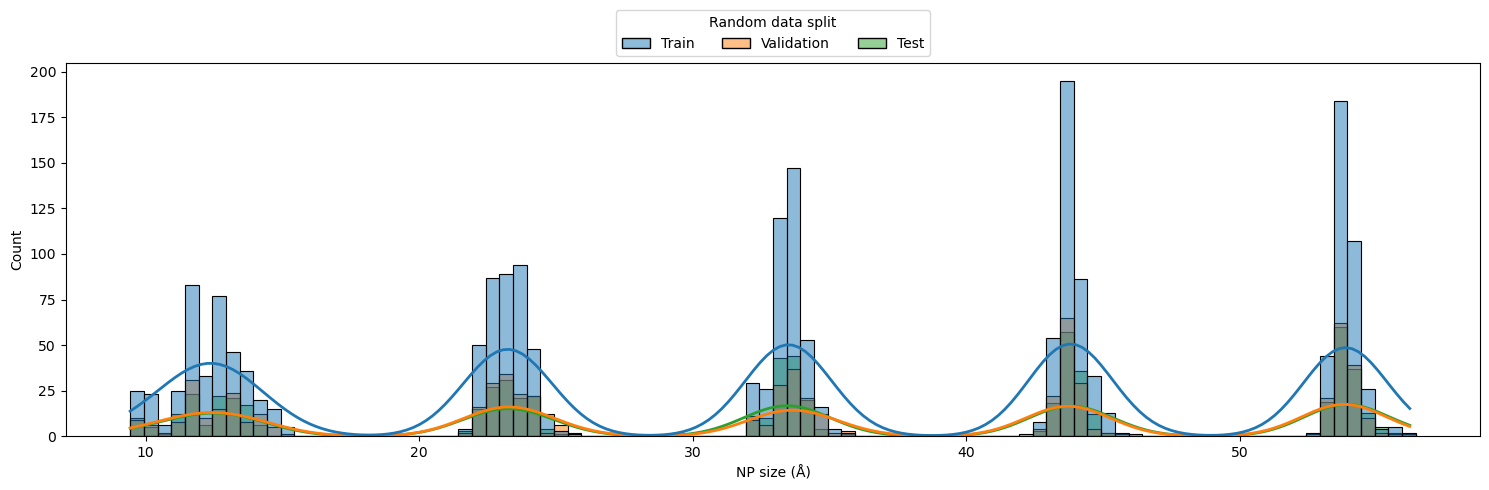

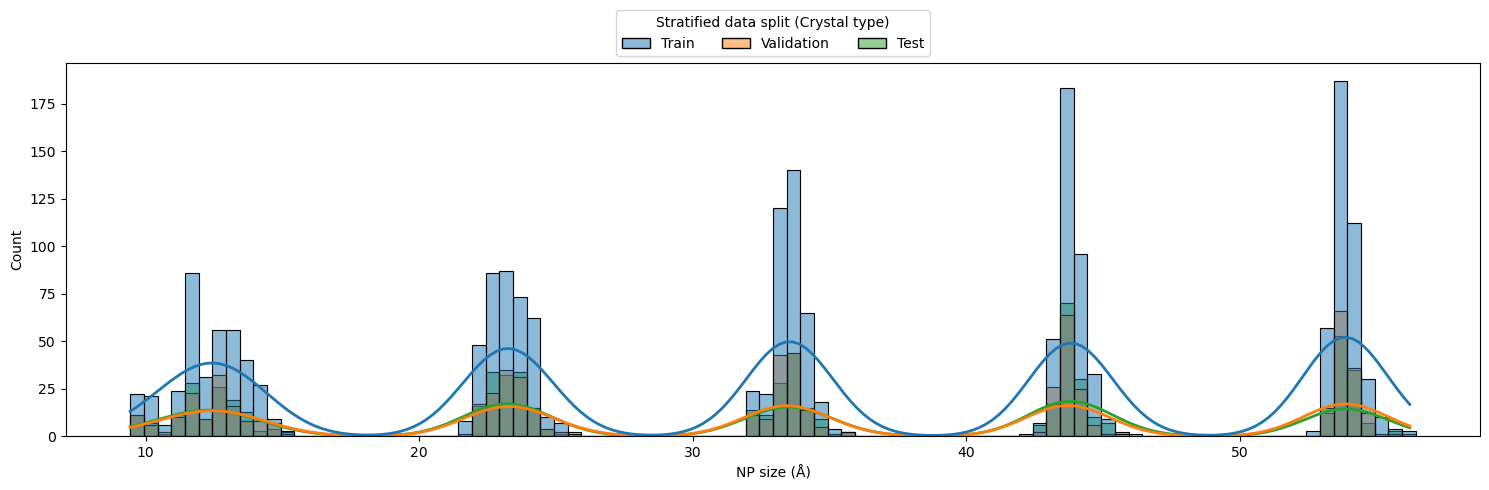

In [10]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=stats, x='NP size (Å)', binwidth=0.5, hue='Random data split', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

plt.figure(figsize=(15,5))
ax = sns.histplot(data=stats, x='NP size (Å)', binwidth=0.5, hue='Stratified data split (Crystal type)', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

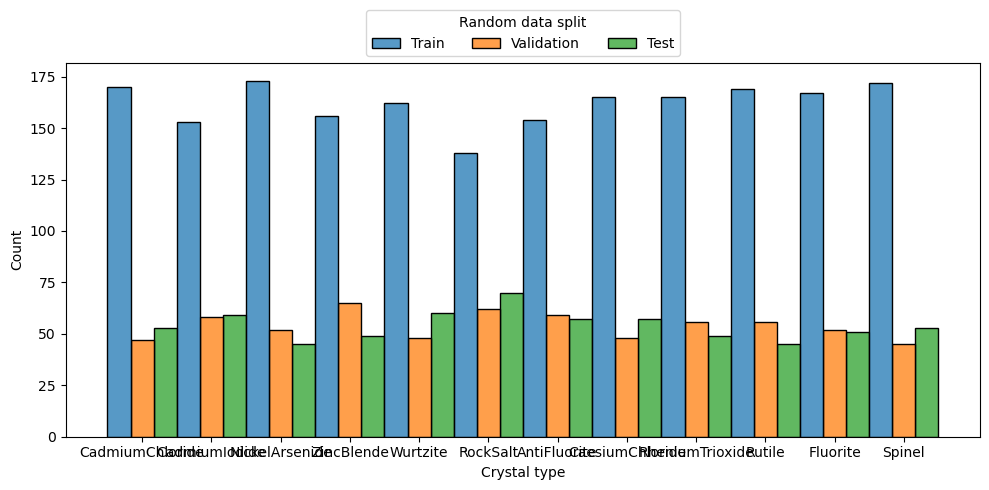

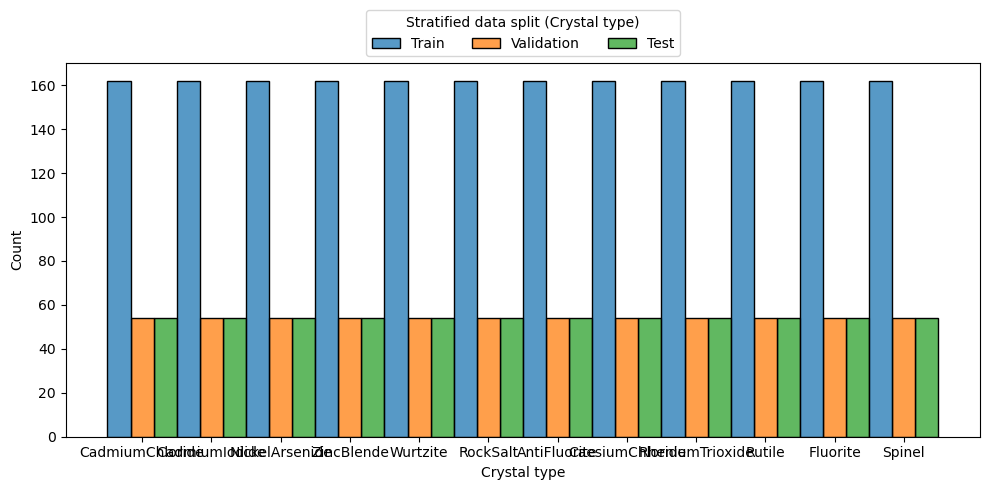

In [11]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=stats, x='Crystal type', hue='Random data split', multiple='dodge', palette=color_dict, hue_order=hue_order)
# ax = sns.histplot(data=stats, x='Crystal type', hue='Stratified data split (Crystal type)', multiple='dodge', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_crystalTypes.png', format='png', dpi=300)
plt.show()

plt.figure(figsize=(10,5))
#ax = sns.histplot(data=stats, x='Crystal type', hue='Random data split', multiple='dodge', palette=color_dict, hue_order=hue_order)
ax = sns.histplot(data=stats, x='Crystal type', hue='Stratified data split (Crystal type)', multiple='dodge', palette=color_dict, hue_order=hue_order)
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_crystalTypes.png', format='png', dpi=300)
plt.show()

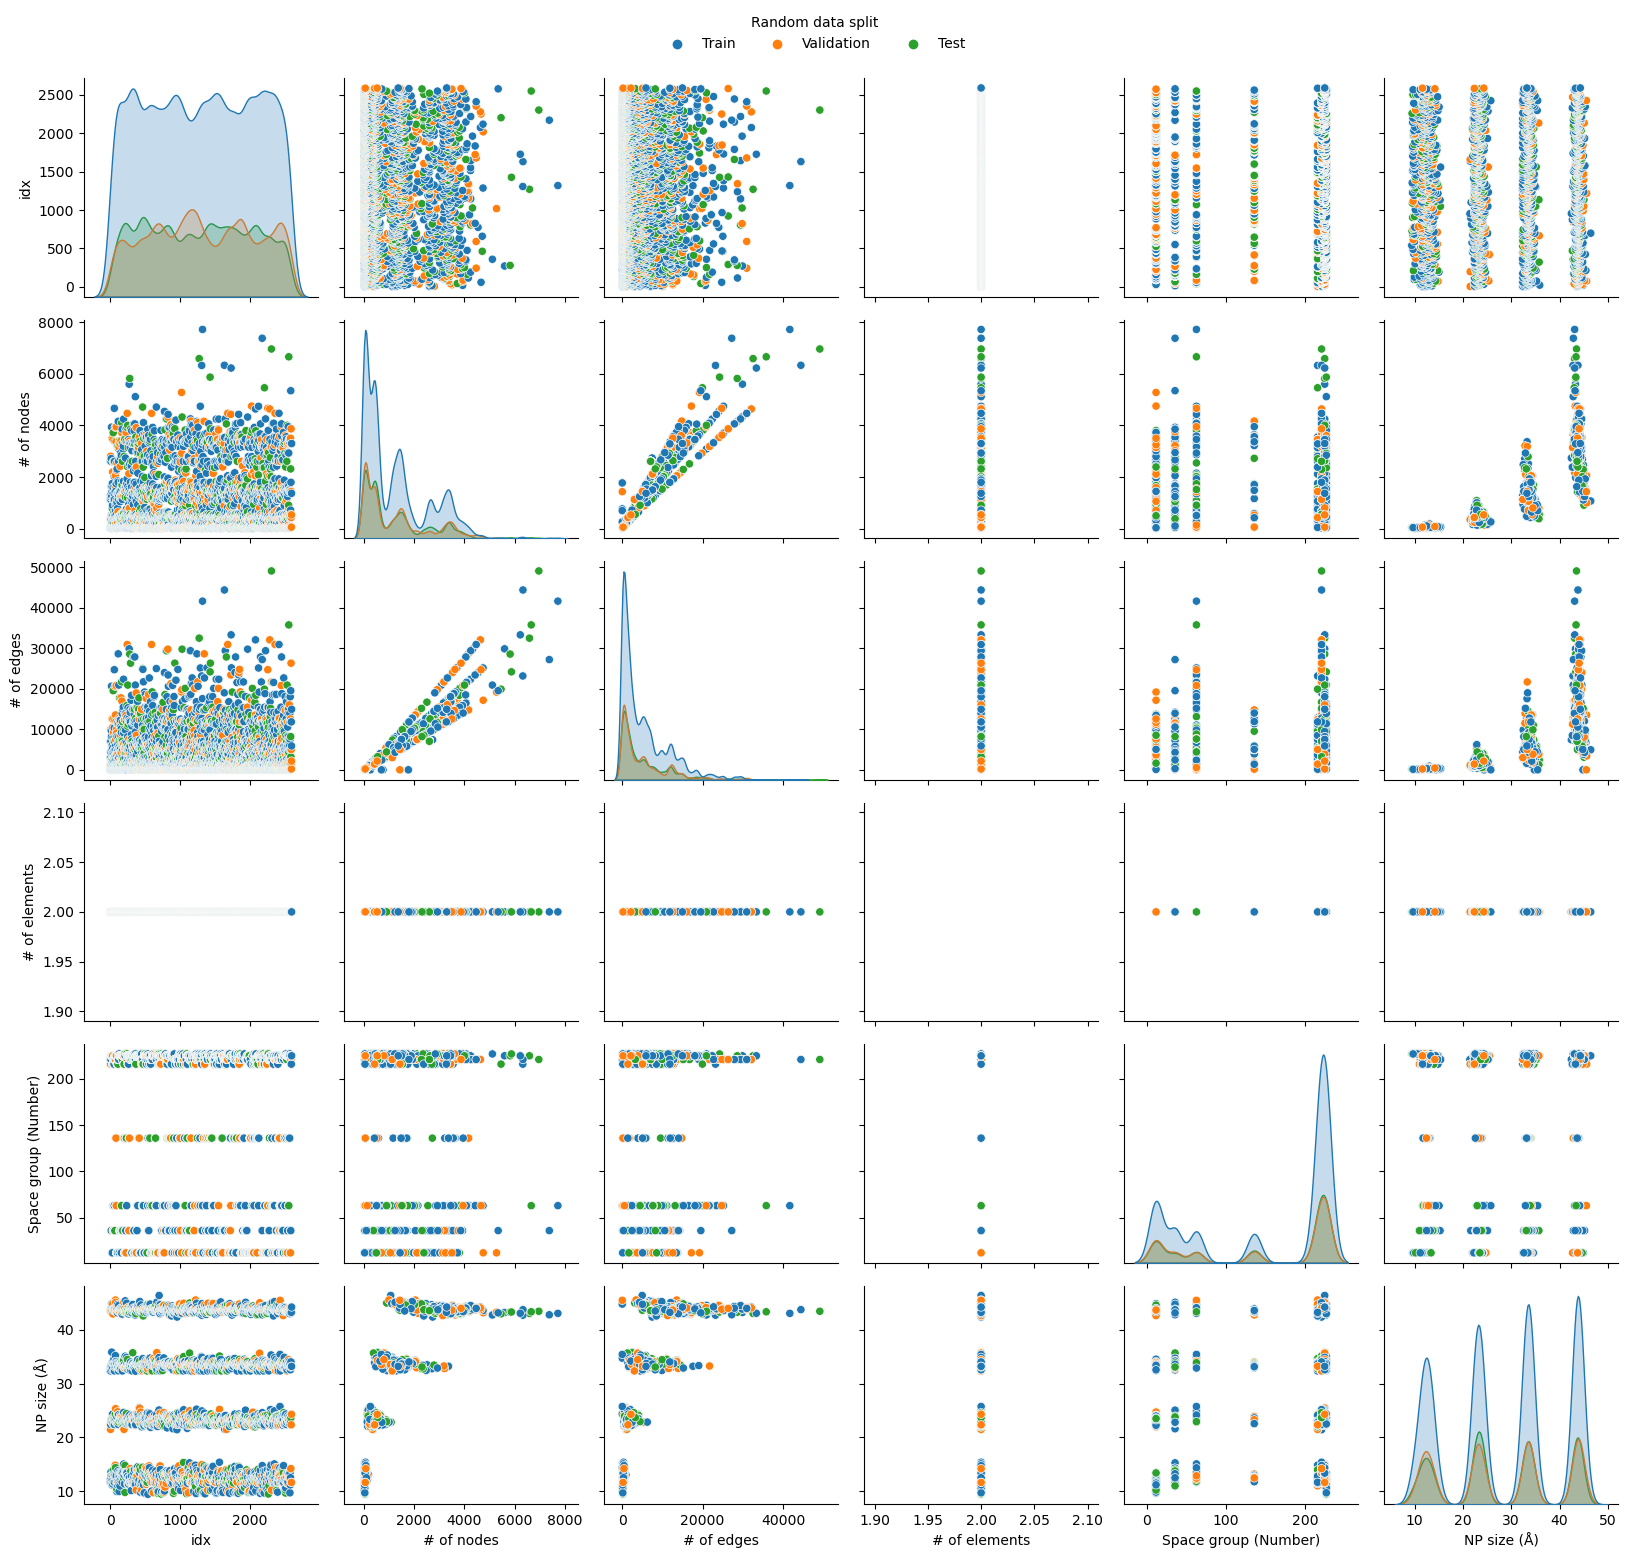

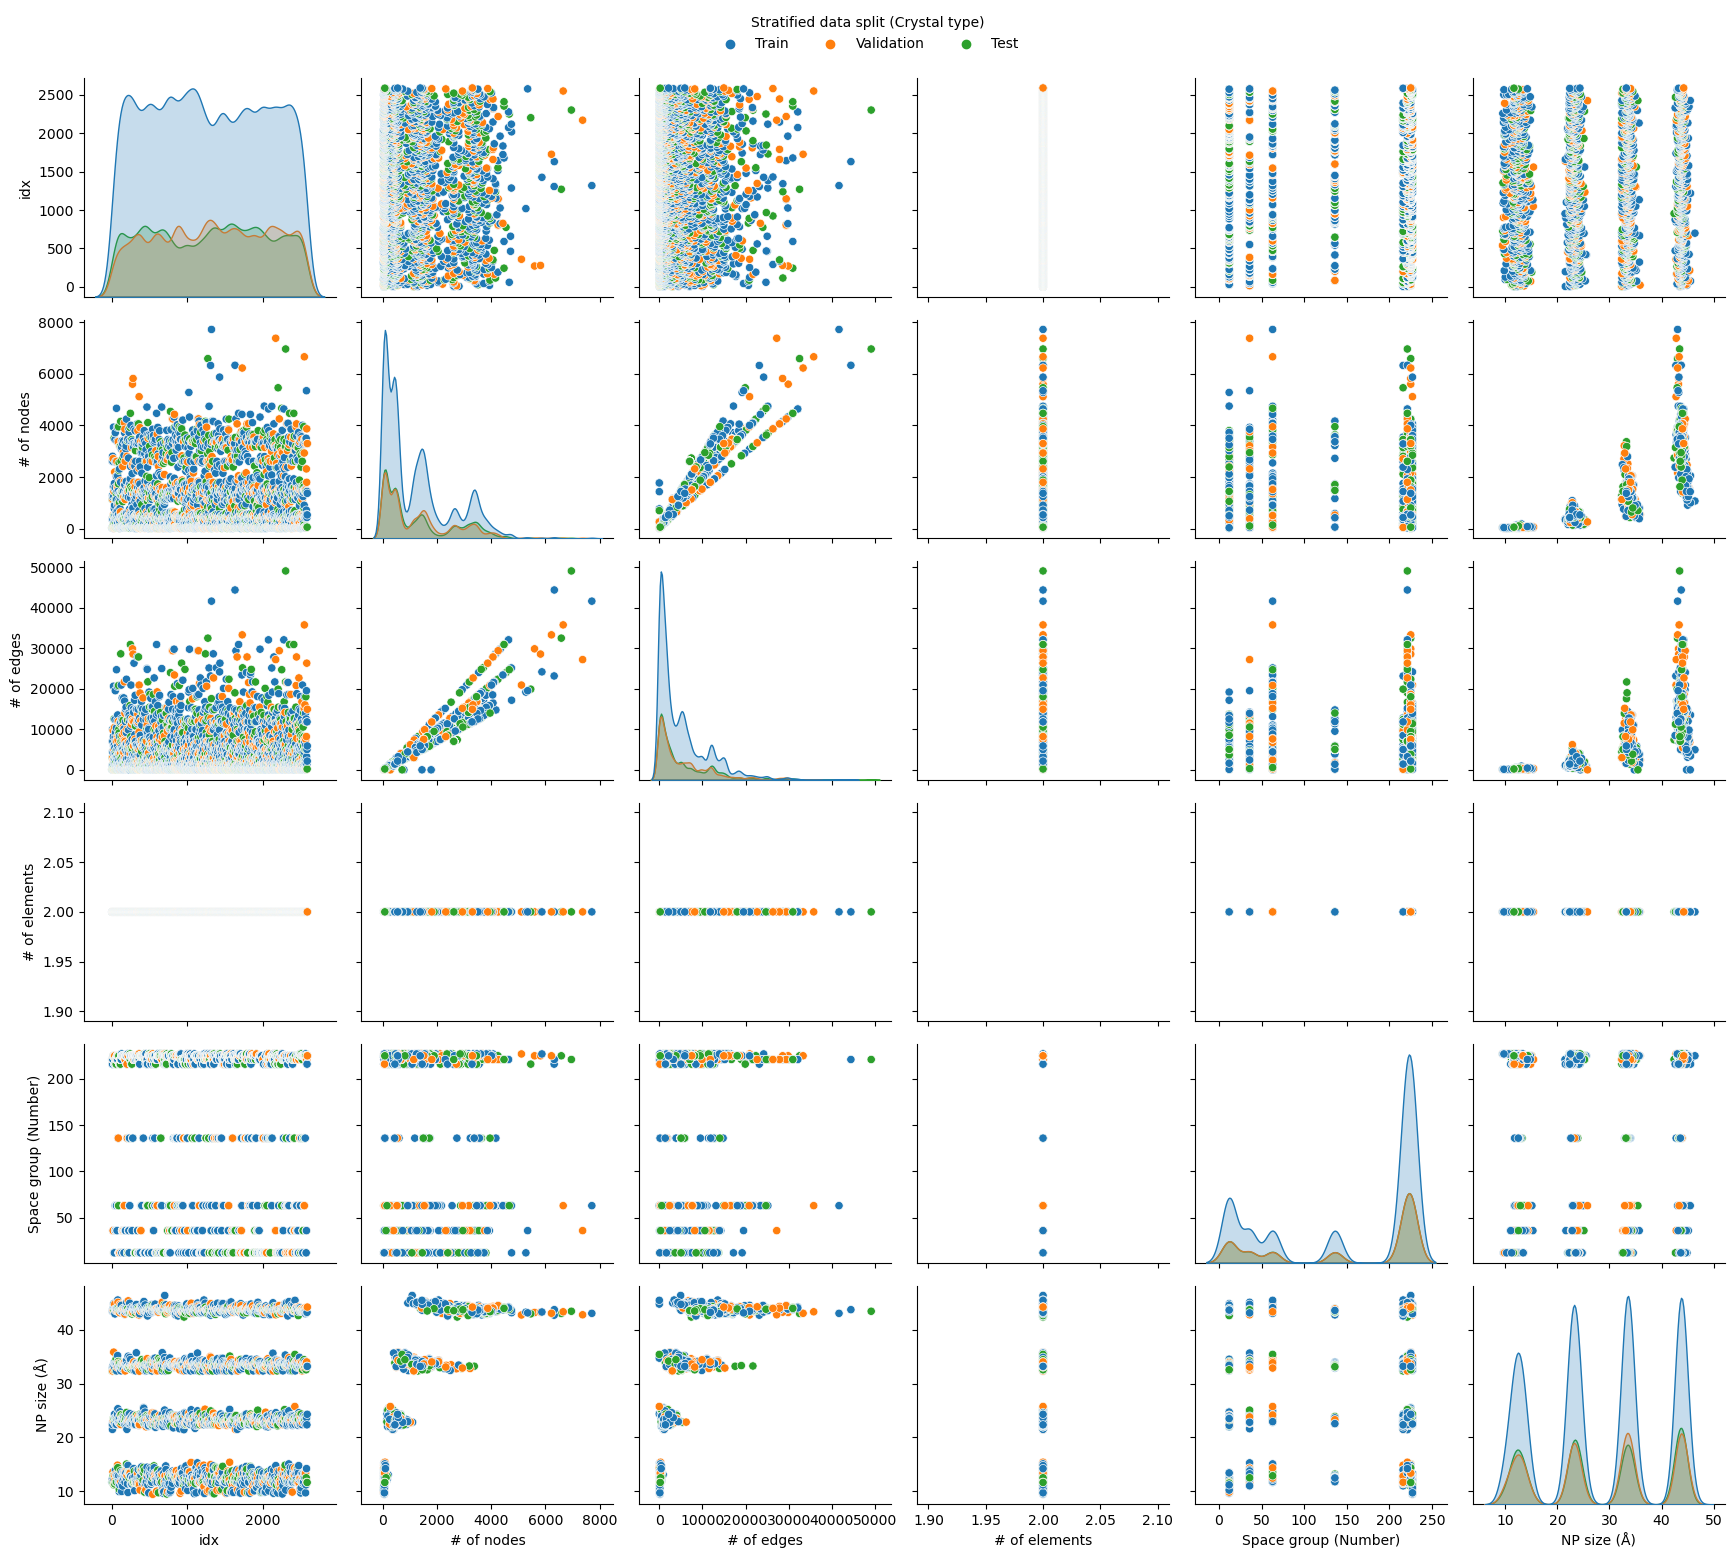

In [19]:
ax = sns.pairplot(data=stats.drop('Elements', axis=1), hue='Random data split', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), hue='Stratified data split (Crystal type)', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), diag_kws=dict(bw_method=0.1))
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_pairplot.png', format='png', dpi=300)
plt.show()

#ax = sns.pairplot(data=stats, hue='Random data split', diag_kws=dict(bw_method=0.1))
ax = sns.pairplot(data=stats.drop('Elements', axis=1), hue='Stratified data split (Crystal type)', diag_kws=dict(bw_method=0.1), palette=color_dict, hue_order=hue_order)
# ax = sns.pairplot(data=stats.drop('Elements', axis=1), diag_kws=dict(bw_method=0.1))
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_pairplot.png', format='png', dpi=300)
plt.show()

In [25]:
stats.columns

Index(['idx', '# of nodes', '# of edges', '# of elements',
       'Space group (Symbol)', 'Space group (Number)', 'Crystal type',
       'NP size (Å)', 'Elements', 'Random data split',
       'Stratified data split (Crystal type)'],
      dtype='object')